In [1]:
%matplotlib notebook

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
import calendar

In [12]:
# Save path to dataset in a variable
traffic_file = 'Resources/traffic (main).csv'

# Read data
traffic_df = pd.read_csv(traffic_file)
traffic_df.head()

,Unnamed: 0,Address,Issue Reported,Latitude,Location,Longitude,Date Time Published,Traffic Report ID,Traffic Report Status (TRS),TRS Date Time,Date,Time
0,0,5400 Brodie Ln,Accident/Collision,30.230326,"(30.2303264,-97.8199774)",-97.819977,2017-09-26T11:11:00.000,EC10DB9185C9C58A004FA683DD21AFCD16CAD418,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:11:00
1,1,8800 Corran Ferry Dr,Accident/Collision,30.201610,"(30.2016097,-97.8530411)",-97.853041,2017-09-26T11:19:00.000,B25B748A59D8B6B5B5AE3E9D985289E795C874ED,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:19:00
2,2,N Lamar Blvd Nb & Morrow St,Accident/Collision,30.343978,"(30.3439776,-97.7149716)",-97.714972,2017-09-26T11:55:00.000,B17F4787F2799F2665E5F119FC2F47D569212C4C,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:55:00
3,3,11000 Fm 2222 Rd,Accident/Collision,30.396632,"(30.3966315,-97.8487281)",-97.848728,2017-09-26T12:08:00.000,15D1EE116284B85E5DE3E00564518367FE994DE7,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,12:08:00
4,4,Mount Bonnell Rd & Tortuga Trl,Accident/Collision,30.339233,"(30.339233,-97.7779837)",-97.777984,2017-09-26T12:20:00.000,89CA91E6C9B28BDCFB629B12758F955D21072594,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,12:20:00


In [13]:
# Add a new column called 'Day' that returns the name of the day of the week
traffic_df['Date']=pd.to_datetime(traffic_df['Date'])
traffic_df['Day'] = traffic_df['Date'].dt.weekday_name
traffic_df.head()

,Unnamed: 0,Address,Issue Reported,Latitude,Location,Longitude,Date Time Published,Traffic Report ID,Traffic Report Status (TRS),TRS Date Time,Date,Time,Day
0,0,5400 Brodie Ln,Accident/Collision,30.230326,"(30.2303264,-97.8199774)",-97.819977,2017-09-26T11:11:00.000,EC10DB9185C9C58A004FA683DD21AFCD16CAD418,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:11:00,Tuesday
1,1,8800 Corran Ferry Dr,Accident/Collision,30.201610,"(30.2016097,-97.8530411)",-97.853041,2017-09-26T11:19:00.000,B25B748A59D8B6B5B5AE3E9D985289E795C874ED,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:19:00,Tuesday
2,2,N Lamar Blvd Nb & Morrow St,Accident/Collision,30.343978,"(30.3439776,-97.7149716)",-97.714972,2017-09-26T11:55:00.000,B17F4787F2799F2665E5F119FC2F47D569212C4C,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,11:55:00,Tuesday
3,3,11000 Fm 2222 Rd,Accident/Collision,30.396632,"(30.3966315,-97.8487281)",-97.848728,2017-09-26T12:08:00.000,15D1EE116284B85E5DE3E00564518367FE994DE7,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,12:08:00,Tuesday
4,4,Mount Bonnell Rd & Tortuga Trl,Accident/Collision,30.339233,"(30.339233,-97.7779837)",-97.777984,2017-09-26T12:20:00.000,89CA91E6C9B28BDCFB629B12758F955D21072594,ARCHIVED,2018-05-17T20:00:00.000,2017-09-26,12:20:00,Tuesday


In [16]:
# Find the total number of incidents that occurred for each date and what day of the week it was
grouped_df = traffic_df.groupby(['Day','Date'])[['Issue Reported']].count()
grouped_df.head()

Issue Reported
Day    Date                      
Friday 2017-09-29             195
       2017-10-06              87
       2017-10-13             249
       2017-10-20             258
       2017-10-27             233

In [17]:
# Use the unstack() method to pivot grouped_df
unstacked_df = grouped_df.unstack(level=0)

# Reorder the columns
unstacked_df = unstacked_df[[('Issue Reported', 'Monday'),
 ('Issue Reported', 'Tuesday'),
 ('Issue Reported', 'Wednesday'),
 ('Issue Reported', 'Thursday'),
 ('Issue Reported', 'Friday'),
 ('Issue Reported', 'Saturday'),
 ('Issue Reported', 'Sunday')]]
unstacked_df.head()

Issue Reported                                                  
Day                Monday Tuesday Wednesday Thursday Friday Saturday Sunday
Date                                                                       
2017-09-26            NaN    23.0       NaN      NaN    NaN      NaN    NaN
2017-09-27            NaN     NaN     119.0      NaN    NaN      NaN    NaN
2017-09-28            NaN     NaN       NaN    231.0    NaN      NaN    NaN
2017-09-29            NaN     NaN       NaN      NaN  195.0      NaN    NaN
2017-09-30            NaN     NaN       NaN      NaN    NaN    132.0    NaN

In [18]:
# Find the average number of incidents for each day of the week
day_averages = unstacked_df.mean()
day_averages

                Day      
Issue Reported  Monday       188.540984
                Tuesday      197.306452
                Wednesday    199.274194
                Thursday     198.000000
                Friday       222.387097
                Saturday     167.475410
                Sunday       126.491803
dtype: float64

<IPython.core.display.Javascript object>


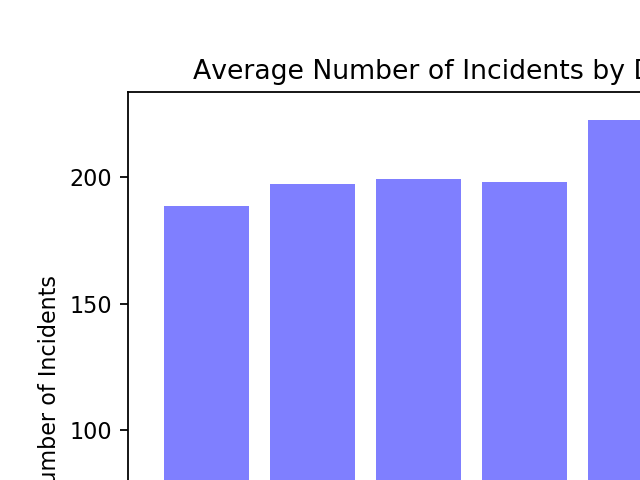

<Container object of 7 artists>

In [19]:
# Create bar chart
x_axis = np.arange(len(day_averages))
plt.bar(x_axis, day_averages, color='b', alpha=0.5, align="center")

In [20]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)

([<matplotlib.axis.XTick at 0x110fd50f0>,
 <a list of 7 Text xticklabel objects>)

In [21]:
# Give chart a title and labels
plt.title("Average Number of Incidents by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Incidents")

Text(60.9306,0.5,'Number of Incidents')

In [22]:
# Save the plot and display it
plt.savefig("../Deliverables/avg_incidents_per_week_day.png")
plt.show()